<a href="https://colab.research.google.com/github/sabdaaf/learning-ADS/blob/main/week4_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize

In [2]:
#load dataset
df = pd.read_csv('adult.csv', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

In [4]:
#drop duplicate value
df.drop_duplicates(inplace=True)

In [5]:
#data type
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [6]:
#cek missing value
df.replace(' ?', np.nan, inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64


income
<=50K    22633
>50K      7506
Name: count, dtype: int64


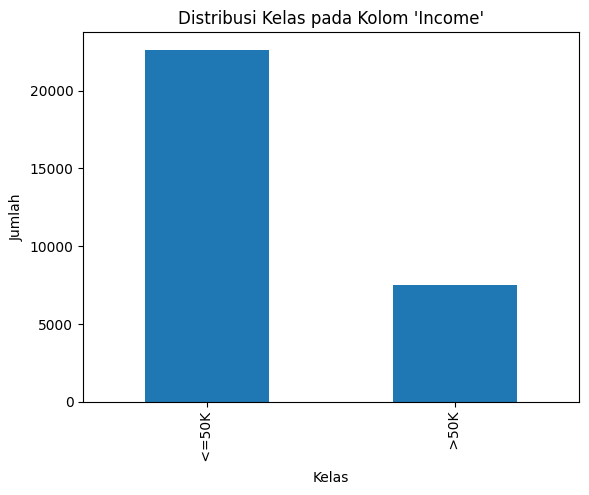

In [8]:
#cek imbalance pada income
print(df['income'].value_counts())
df['income'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas pada Kolom 'Income'")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

<ipython-input-9-f6fd97255c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['income'], y=df['education_num'], palette='coolwarm')


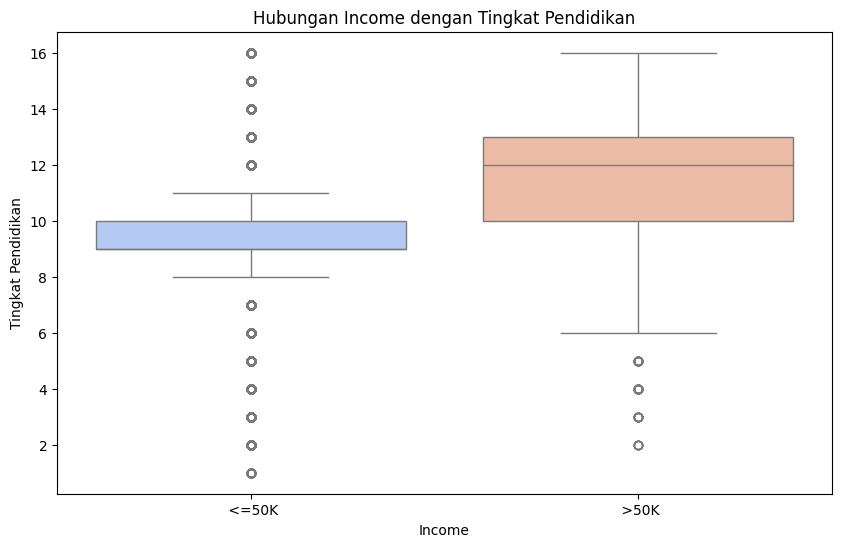

In [9]:
#visualisasi hubungan income dengan pendidikan
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['income'], y=df['education_num'], palette='coolwarm')
plt.title('Hubungan Income dengan Tingkat Pendidikan')
plt.xlabel('Income')
plt.ylabel('Tingkat Pendidikan')
plt.show()


In [11]:
#encoding categorical variables
ordinal_features = ['education', 'marital_status']
label_encoders = {}
for feature in ordinal_features:
    label_encoders[feature] = LabelEncoder() # Indented this line
    df[feature] = label_encoders[feature].fit_transform(df[feature]) # Indented this line

nominal_features = ["workclass", "occupation", "relationship", "race", "sex", "native_country"]
df = pd.get_dummies(df, columns=nominal_features)

In [12]:
df["income"] = df["income"].str.strip().map({"<=50K": 0, ">50K": 1})

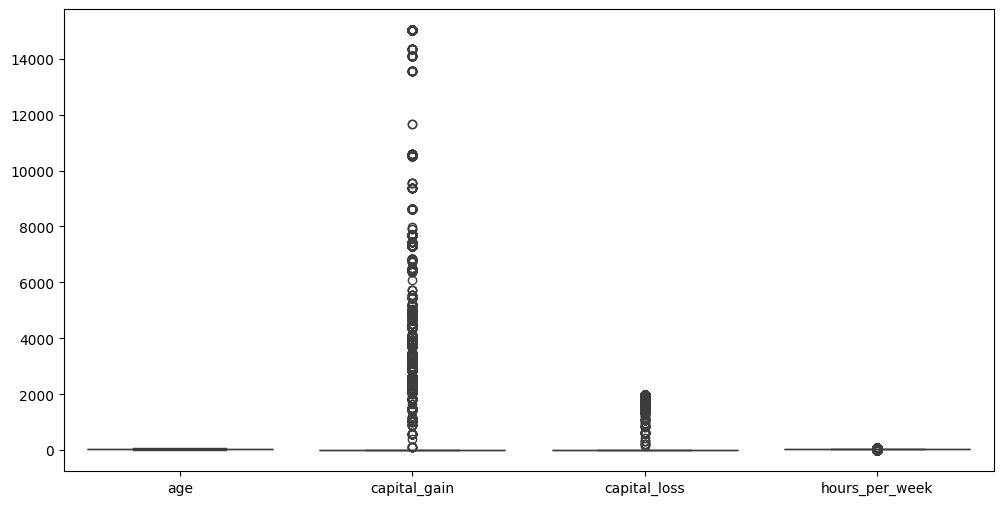

In [14]:
#winsorizing untuk outlier
for col in ['age', 'capital_gain', 'capital_loss', 'hours_per_week']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01]) # Indented this line

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
plt.show()

In [15]:
#split data
X = df.drop(columns=["income"])
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#handle imbalance data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
#inisialisasi model
models = {
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"KNN": KNeighborsClassifier(),
"Logistic Regression": LogisticRegression(max_iter=1000),
"SVM": SVC()
}


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4485
           1       0.73      0.67      0.70      1543

    accuracy                           0.85      6028
   macro avg       0.81      0.79      0.80      6028
weighted avg       0.85      0.85      0.85      6028

Training Time: 5.59 detik


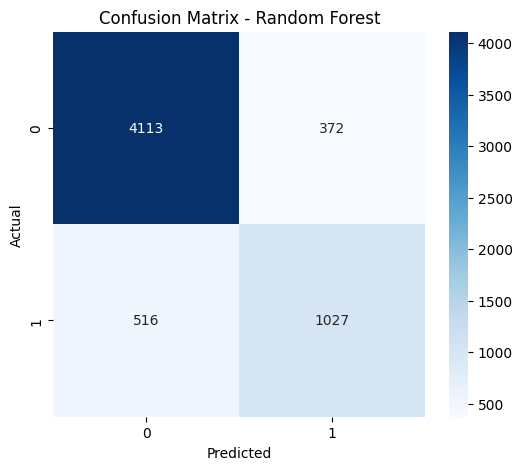


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4485
           1       0.60      0.62      0.61      1543

    accuracy                           0.80      6028
   macro avg       0.73      0.74      0.74      6028
weighted avg       0.80      0.80      0.80      6028

Training Time: 0.42 detik


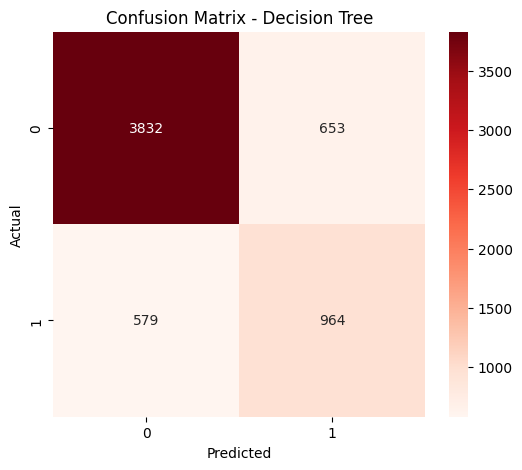


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.82      0.68      0.75      4485
           1       0.38      0.56      0.45      1543

    accuracy                           0.65      6028
   macro avg       0.60      0.62      0.60      6028
weighted avg       0.71      0.65      0.67      6028

Training Time: 0.03 detik


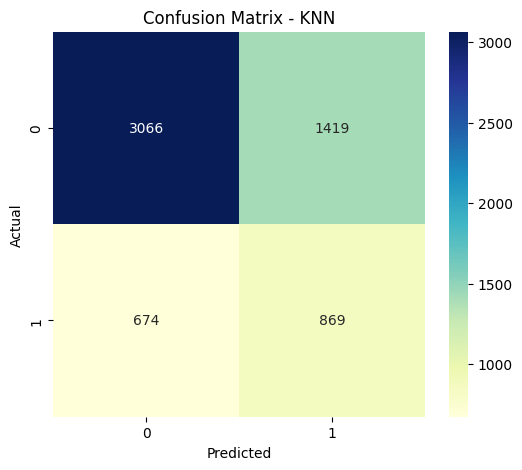

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      4485
           1       0.46      0.70      0.56      1543

    accuracy                           0.71      6028
   macro avg       0.67      0.71      0.67      6028
weighted avg       0.77      0.71      0.73      6028

Training Time: 11.13 detik


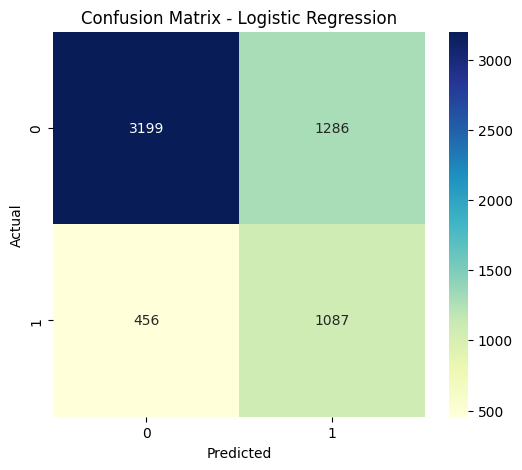


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4485
           1       0.80      0.21      0.33      1543

    accuracy                           0.78      6028
   macro avg       0.79      0.59      0.60      6028
weighted avg       0.79      0.78      0.73      6028

Training Time: 160.55 detik


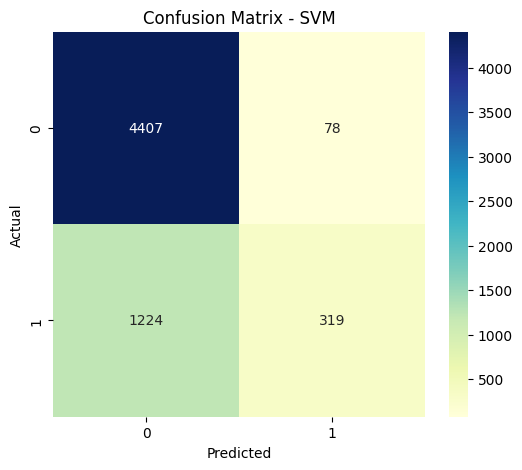

In [26]:
def plot_confusion_matrix(y_true, y_pred, model_name, cmap):
    plt.figure(figsize=(6, 5)) # Indented this line
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap=cmap) # Indented this line
    plt.title(f'Confusion Matrix - {model_name}') # Indented this line
    plt.xlabel('Predicted') # Indented this line
    plt.ylabel('Actual') # Indented this line
    plt.show() # Indented this line

for name, model in models.items():
    start = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    end = time.time()
    y_pred = model.predict(X_test)
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Training Time: {end - start:.2f} detik")
    cmap = "Blues" if name == "Random Forest" else ("Reds" if name == "Decision Tree" else "YlGnBu")
    plot_confusion_matrix(y_true=y_test, y_pred=y_pred, model_name=name, cmap=cmap) # added y_true, y_pred, model_name, and cmap parameters

Kesimpulan & Rekomendasi
Random Forest adalah model terbaik secara keseluruhan:

Akurasi tinggi: 85%

F1-score baik untuk kedua kelas (0.90 dan 0.70)

Precision dan recall seimbang

Waktu pelatihan relatif cepat (5.59 detik)

Cocok untuk data yang cukup besar dan kompleks seperti ini

Decision Tree:

Lebih cepat dilatih (0.42 detik)

Namun F1-score untuk kelas 1 hanya 0.61, sehingga kurang seimbang

Cocok untuk baseline atau interpretasi model karena lebih mudah dijelaskan

KNN dan Logistic Regression:

Akurasi lebih rendah (sekitar 65–71%)

Recall dan precision untuk kelas 1 kurang baik

KNN sangat cepat, tapi tidak cocok untuk high-dimensional data

Logistic Regression butuh waktu pelatihan lebih lama dari Random Forest (11.13 detik) tapi hasilnya kurang optimal

SVM:

Akurasi cukup baik (78%), precision tinggi (0.80), tapi recall sangat rendah untuk kelas 1 (0.21)

Waktu pelatihan sangat lama (160.55 detik), kurang efisien untuk data besar

Tidak direkomendasikan untuk kasus ini